# Part 3 - Neural Network

In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas import DataFrame
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

df = DataFrame.from_csv("clean_datatable.csv", sep=",")
df.head(10)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  app.launch_new_instance()


,S BET(m2/g),Vtotal (cm3/g),Vmicro (cm3/g),T(oC),P(bar),CO2uptake (mmol/g)
0,798.0,0.18,0.42,25.0,5.0,2.0
1,241.0,1.01,0.09,25.0,5.0,0.7
2,448.0,1.09,0.21,25.0,5.0,0.9
3,826.0,0.91,0.39,25.0,5.0,1.8
4,895.0,0.90,0.40,25.0,5.0,2.8
5,862.0,0.91,0.39,25.0,5.0,2.1
6,678.0,1.10,0.30,25.0,5.0,2.3
7,304.0,1.06,0.14,25.0,5.0,0.9
8,500.0,0.77,0.23,25.0,5.0,2.2
9,931.0,1.01,0.39,25.0,5.0,3.0


Let us make sure that no missing values were found:

In [2]:
df.isna().sum()

S BET(m2/g)           0
Vtotal (cm3/g)        0
Vmicro (cm3/g)        0
T(oC)                 0
P(bar)                0
CO2uptake (mmol/g)    0
dtype: int64

After we took a look on data, we split it on a training and test sets using cross-validation. Since the numerical values in the data correspond to different parameters, it is desirable to scale the data:

In [3]:
#splitting dataset:
dataset = df.values
X = dataset[:,0:5]
y = dataset[:,5]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.08, random_state = 0)
#scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Now we need to define our model:

In [4]:
#create neural network as a function 
def baseline_model():
    model = Sequential()
    model.add(Dense(20, input_dim=5, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(1))
    return model
NN = baseline_model()
NN.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                630       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 781
Trainable params: 781
Non-trainable params: 0
_________________________________________________________________


Few words about metrics under compilation of the neural network. Since it is a regression problem, then having metrics is not mandatory. If we however were dealing with a classification problem, then we could use 'accuracy' as a metric. The only metrics that are applicable with a regression problem are MSE, MAE, MAPE and cos proximity.

In [5]:
# Compile the mnodel
# NB for classifier use metrics but no REGRESSION!
NN.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mae'])
#NB! Check out ADAM optimizer and "accuracy" as another metric

In [6]:
# Fit a.k.a. training of the model
NN.fit(X_train, y_train, epochs=200, batch_size=10)
print(NN)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
970/970 [==============================] - 1s 949us/step - loss: 5.2162 - mean_absolute_error: 5.2162
Epoch 2/200
970/970 [==============================] - 0s 146us/step - loss: 3.5610 - mean_absolute_error: 3.5610
Epoch 3/200
970/970 [==============================] - 0s 129us/step - loss: 2.6501 - mean_absolute_error: 2.6501
Epoch 4/200
970/970 [==============================] - 0s 132us/step - loss: 2.3985 - mean_absolute_error: 2.3985
Epoch 5/200
970/970 [==============================] - 0s 137us/step - loss: 2.1902 - mean_absolute_error: 2.1902
Epoch 6/200
970/970 [==============================] - 0s 143us/step - loss: 1.9849 - mean_absolute_error: 1.9849
Epoch 7/200
970/970 [==============================] - 0s 139us/step - loss: 1.8066 - mean_absolute_error: 1.8066
Epoch 8/200
970/970 [==============================] - 0s 131us/step - loss: 1.6558 - mean_absolute_error: 1.6558
Epoch 9/200
970/970 [===================

970/970 [==============================] - 0s 127us/step - loss: 0.5595 - mean_absolute_error: 0.5595
Epoch 71/200
970/970 [==============================] - 0s 126us/step - loss: 0.5439 - mean_absolute_error: 0.5439
Epoch 72/200
970/970 [==============================] - 0s 126us/step - loss: 0.5546 - mean_absolute_error: 0.5546
Epoch 73/200
970/970 [==============================] - 0s 128us/step - loss: 0.5491 - mean_absolute_error: 0.5491
Epoch 74/200
970/970 [==============================] - 0s 128us/step - loss: 0.5586 - mean_absolute_error: 0.5586
Epoch 75/200
970/970 [==============================] - 0s 127us/step - loss: 0.5476 - mean_absolute_error: 0.5476
Epoch 76/200
970/970 [==============================] - 0s 127us/step - loss: 0.5398 - mean_absolute_error: 0.5398
Epoch 77/200
970/970 [==============================] - 0s 127us/step - loss: 0.5475 - mean_absolute_error: 0.5475
Epoch 78/200
970/970 [==============================] - 0s 128us/step - loss: 0.5450 - mean_a

Epoch 141/200
970/970 [==============================] - 0s 124us/step - loss: 0.4722 - mean_absolute_error: 0.4722
Epoch 142/200
970/970 [==============================] - 0s 125us/step - loss: 0.4663 - mean_absolute_error: 0.4663
Epoch 143/200
970/970 [==============================] - 0s 133us/step - loss: 0.4743 - mean_absolute_error: 0.4743
Epoch 144/200
970/970 [==============================] - 0s 140us/step - loss: 0.4614 - mean_absolute_error: 0.4614
Epoch 145/200
970/970 [==============================] - 0s 134us/step - loss: 0.4698 - mean_absolute_error: 0.4698
Epoch 146/200
970/970 [==============================] - 0s 124us/step - loss: 0.4659 - mean_absolute_error: 0.4659
Epoch 147/200
970/970 [==============================] - 0s 128us/step - loss: 0.4811 - mean_absolute_error: 0.4811
Epoch 148/200
970/970 [==============================] - 0s 147us/step - loss: 0.4635 - mean_absolute_error: 0.4635
Epoch 149/200
970/970 [==============================] - 0s 199us/step -

In [7]:
# make predictions
y_pred = NN.predict(X_test)

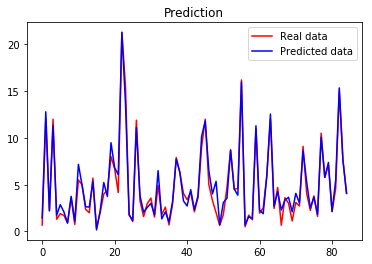

In [21]:
#plot the results
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

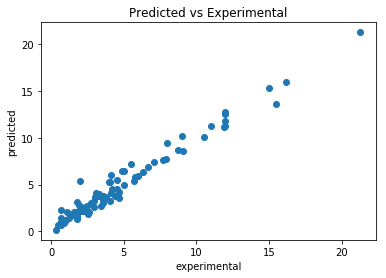

In [22]:
plt.title("Predicted vs Experimental")
plt.xlabel("experimental")
plt.ylabel("predicted")
plt.scatter(y_test, y_pred)

By looking on the plot of the experimental values vs predicted, we find out that our neural network performs great! The correlation is linear and MAE is even less than in case with XGBoost machine learning algorithm (see part 2). 

Now let us see how the model will perform on the unseen data. For this we import six carbon materials with known CO2 uptake capacities.  

In [23]:
#loading the table 
df2 = DataFrame.from_csv("experimental_Samples.csv", sep=",")
df2 = df2.values

#defining the features and the target
X_2 = df2[:,0:5]
y_2 = df2[:,5]

#scaling the data
X_2 = sc.transform(X_2)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


In [24]:
# prediction
y_pred_2 = NN.predict(X_2)


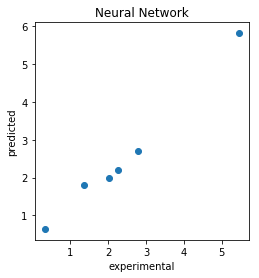

Mean Absolute Error : 0.21348518848419187


In [25]:
plt.scatter(y_2, y_pred_2)
plt.axis('scaled')
plt.title("Neural Network")
plt.xlabel("experimental")
plt.ylabel("predicted")

plt.show()

print("Mean Absolute Error : " + str(mean_absolute_error(y_pred_2, y_2)))

The predictions are great! 
In this tutorial, I demonstrated how machine learning algorithms and neural networks can be used to 